# 국내 지진 데이터
: 최초 관측일부터 2023년 3월 14일까지의 지진 통계 데이터 

출처
    - 기상청 날씨누리 https://www.weather.go.kr/w/eqk-vol/search/korea.do

처리목적
    - 전국, 영남지역의 지진 데이터를 년도별, 규모별, 위치별로 분리 후 시각화를 통해 추이 확인

처리사항

    1. 국내 지진 데이터를 전국 단위와 영남지역 단위로 분류 
    2. 지역별 지진 발생 년도와 횟수, 규모 확인\n
    3. 결과 시각화

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
eq = pd.read_csv('/content/drive/MyDrive/아/데이터/국내지진 통계.csv')
eq.head()

,번호,발생시각,규모,깊이(km),최대,위도,경도,위치
0,NaN,NaN,NaN,NaN,진도,NaN,NaN,NaN
1,2116.0,2023-03-14 2:18,2.4,20,Ⅰ,41.27 N,129.14 E,북한 함경북도 길주 북북서쪽 38km 지역
2,2115.0,2023-03-10 0:13,2.1,9,Ⅰ,41.27 N,129.06 E,북한 함경북도 길주 북북서쪽 42km 지역
3,2114.0,2023-03-07 15:13,2.1,16,Ⅰ,36.79 N,125.63 E,충남 태안군 서격렬비도 북북동쪽 21km 해역
4,2113.0,2023-03-03 11:26,3.0,8,Ⅳ,35.21 N,127.94 E,경남 진주시 서북서쪽 16km 지역


#### 데이터 살펴보기

In [4]:
eq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   번호      2116 non-null   float64
 1   발생시각    2116 non-null   object 
 2   규모      2116 non-null   float64
 3   깊이(km)  952 non-null    object 
 4   최대      364 non-null    object 
 5   위도      2116 non-null   object 
 6   경도      2116 non-null   object 
 7   위치      2116 non-null   object 
dtypes: float64(2), object(6)
memory usage: 132.4+ KB


In [5]:
# 필요없는 컬럼 삭제
eq = eq.drop(['번호', '깊이(km)', '최대'], axis=1)
eq.head(3)

,발생시각,규모,위도,경도,위치
0,NaN,NaN,NaN,NaN,NaN
1,2023-03-14 2:18,2.4,41.27 N,129.14 E,북한 함경북도 길주 북북서쪽 38km 지역
2,2023-03-10 0:13,2.1,41.27 N,129.06 E,북한 함경북도 길주 북북서쪽 42km 지역


In [6]:
# 인덱스 재설정
eq = eq.drop([0], axis=0)
eq.reset_index(drop=True)

,발생시각,규모,위도,경도,위치
0,2023-03-14 2:18,2.4,41.27 N,129.14 E,북한 함경북도 길주 북북서쪽 38km 지역
1,2023-03-10 0:13,2.1,41.27 N,129.06 E,북한 함경북도 길주 북북서쪽 42km 지역
2,2023-03-07 15:13,2.1,36.79 N,125.63 E,충남 태안군 서격렬비도 북북동쪽 21km 해역
3,2023-03-03 11:26,3.0,35.21 N,127.94 E,경남 진주시 서북서쪽 16km 지역
4,2023-02-19 7:29,2.5,34.67 N,127.36 E,전남 고흥군 북동쪽 11km 지역
...,...,...,...,...,...
2111,1978-12-04 15:16,2.8,37.40 N,128.70 E,강원 정선군 북동쪽 4km 지역
2112,1978-11-23 11:06,4.6,38.40 N,125.60 E,북한 황해남도 안악 남동쪽 15km 지역
2113,1978-10-07 18:19,5.0,36.60 N,126.70 E,충남 홍성군 동쪽 3km 지역
2114,1978-09-16 2:07,5.2,36.60 N,127.90 E,경북 상주시 북서쪽 32km 지역


In [7]:
# 결측치 확인
eq.isna().sum()

발생시각    0
규모      0
위도      0
경도      0
위치      0
dtype: int64

In [8]:
# 중복값 확인
print(eq.duplicated(keep=False).sum())

0


#### 위도, 경도 데이터에서 불필요한 문자 지우기(N, E)

In [9]:
# 위도, 경도 데이터에서 불필요한 문자 지우기(N, E)
eq['위도'] = eq['위도'].str.rstrip('N')
eq['경도'] = eq['경도'].str.rstrip('E')

In [10]:
eq['위도'].head()

1    41.27 
2    41.27 
3    36.79 
4    35.21 
5    34.67 
Name: 위도, dtype: object

In [11]:
eq['경도']

1       129.14 
2       129.06 
3       125.63 
4       127.94 
5       127.36 
         ...   
2112    128.70 
2113    125.60 
2114    126.70 
2115    127.90 
2116    124.20 
Name: 경도, Length: 2116, dtype: object

#### 년도별, 지역별로 데이터 전처리
- 자치구까지 나온 컬럼 생성
- 지역별 데이터는 자치구별로 분류(영남군 지역 데이터만)
- 년도별로 그룹화

In [12]:
# 자치구까지 나오도록 전처리
eq['발생지역'] = eq.위치.str.split().str[0] + ' ' + eq.위치.str.split().str[1]
eq['발생지역']

1       북한 함경북도
2       북한 함경북도
3        충남 태안군
4        경남 진주시
5        전남 고흥군
         ...   
2112     강원 정선군
2113    북한 황해남도
2114     충남 홍성군
2115     경북 상주시
2116    북한 평안북도
Name: 발생지역, Length: 2116, dtype: object

In [13]:
eq.발생지역.unique()

array(['북한 함경북도', '충남 태안군', '경남 진주시', '전남 고흥군', '충북 보은군', '북한 황해남도',
       '경북 영덕군', '전남 신안군', '인천 강화군', '제주 서귀포시', '경북 안동시', '울산 북구',
       '경북 김천시', '북한 황해북도', '전남 여수시', '충남 서산시', '충북 괴산군', '충남 천안시',
       '북한 자강도', '북한 강원', '인천 옹진군', '경남 의령군', '경북 경주시', '충남 부여군',
       '경북 봉화군', '경북 포항시', '경북 울릉군', '경남 창원시', '경북 울진군', '경북 상주시',
       '북한 평안남도', '강원 삼척시', '충남 공주시', '전남 영광군', '경북 청도군', '경남 거창군',
       '전북 순창군', '울산 동구', '전남 진도군', '충북 제천시', '북한 함경남도', '경남 하동군',
       '경남 창녕군', '전남 보성군', '경남 밀양시', '경남 함안군', '전남 광양시', '전북 군산시',
       '부산 기장군', '대구 달성군', '경북 예천군', '전북 완주군', '경기 여주시', '전북 익산시',
       '전북 장수군', '경기 파주시', '강원 동해시', '경북 칠곡군', '경남 남해군', '강원 영월군',
       '강원 고성군', '전남 해남군', '충남 금산군', '경남 산청군', '경북 성주군', '제주 제주시',
       '경기 연천군', '북한 평안북도', '경남 고성군', '전북 부안군', '충북 옥천군', '경북 영양군',
       '북한 평양', '충북 충주시', '경북 문경시', '경북 구미시', '대전 유성구', '충남 논산시',
       '전북 무주군', '강원 철원군', '경북 의성군', '충북 영동군', '인천 백령도', '충북 단양군',
       '전남 곡성군', '전남 완도군', '대전 서구', '전남 순천시', '경남 창원', '충남 

In [14]:
# 년도별로 나오도록 전처리
eq['발생시각'] = eq.발생시각.str.split('-').str[0]
eq['발생시각']

1       2023
2       2023
3       2023
4       2023
5       2023
        ... 
2112    1978
2113    1978
2114    1978
2115    1978
2116    1978
Name: 발생시각, Length: 2116, dtype: object

In [15]:
g_a = eq.groupby(['발생시각', '발생지역'])['발생지역'].count()

In [16]:
# 전국 자치구별 데이터
pd.DataFrame(g_a)

발생지역
발생시각 발생지역         
1978 강원 정선군      1
     경북 상주시      1
     북한 평안북도     1
     북한 황해남도     1
     전북 군산시      1
...            ...
2023 전남 고흥군      1
     전남 신안군      4
     제주 서귀포시     1
     충남 태안군      1
     충북 보은군      1

[1020 rows x 1 columns]

#### 영남권 지역별 데이터(영덕군, 포항시, 경주시, 울산광역시, 양산시, 밀양시, 김해시, 창원시, 부산광역시)
- 각 지역별, 년도별 지진발생 데이터 프레임 생성

In [17]:
# 반복작업이므로 함수 정의해서 데이터프레임 생성
def eq_r(name):
    data = eq
    name_d = eq[eq.발생지역.str.contains(name)] #찾고자 하는 지역명 대입
    return pd.DataFrame(name_d.groupby(['발생시각', '발생지역'])['발생지역'].count()) #지역별, 시각별 그룹화해서 반환

In [18]:
# 영덕군
eq_r('영덕군').head(3)

,,발생지역
발생시각,발생지역,
1982,경북 영덕군,1
1991,경북 영덕군,1
1993,경북 영덕군,2


In [19]:
# 포항시
eq_r('포항시').head(3)

,,발생지역
발생시각,발생지역,
1981,경북 포항시,2
1985,경북 포항시,1
1986,경북 포항시,1


In [20]:
# 경주시
eq_r('경주').head(3)

,,발생지역
발생시각,발생지역,
1993,경북 경주시,1
1997,경북 경주시,1
1998,경북 경주시,1


In [21]:
# 울산광역시
eq_r('울산').head(3)

,,발생지역
발생시각,발생지역,
1991,울산 동구,1
1992,울산 동구,2
1993,울산 동구,1


In [22]:
# 양산시
eq_r('양산')

,,발생지역
발생시각,발생지역,


In [23]:
# 밀양시
eq_r('밀양').head(3)

,,발생지역
발생시각,발생지역,
1998,경남 밀양시,1
2002,경남 밀양시,1
2008,경남 밀양시,2


In [24]:
# 김해시
eq_r('김해').head(3)

,,발생지역
발생시각,발생지역,


In [25]:
# 창원시
eq_r('창원').head(3)

,,발생지역
발생시각,발생지역,
1993,경남 창원시,1
2012,경남 창원시,1
2017,경남 창원,1


In [26]:
# 부산시
eq_r('부산')

발생지역
발생시각 발생지역         
1985 부산 해운대구     2
1996 부산 금정구      1
1997 부산 금정구      1
2003 부산 기장군      1
2007 부산 기장군      1
     부산 해운대구     1
2009 부산 기장군      1
2012 부산 기장군      1
2014 부산 기장군      1
2016 부산 기장군      1
2021 부산 기장군      2

## 시각화
- 년도별, 지역별(시단위)로 그래프 그리기
- 지역별(시단위)로 총 지진 발생 횟수 버블맵, 히트맵 그리기

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# 한글 폰트 지원
import platform
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

Unknown system...  sorry~~~


### sns.lineplot()

In [29]:
eq_r('영덕군').to_csv('eq_r("영덕군")')

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 54943 (\N{HANGUL SYLLABLE HOES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IP

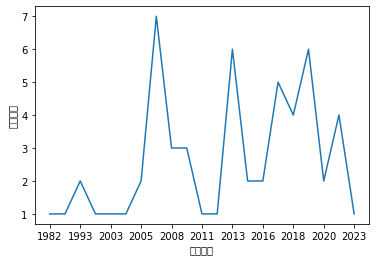

In [30]:
# 영덕군 지진 발생 횟수 그래프

total_len = len(eq_r('영덕군').index)

sns.set_style()
sns.lineplot(x='발생시각', y='발생지역', data=eq_r('영덕군'))
plt.xlabel('발생년도', fontsize=10)
plt.ylabel('발생횟수', fontsize=10)
plt.xticks(np.arange(0,total_len+1, 2))

plt.show()

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 54943 (\N{HANGUL SYLLABLE HOES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IP

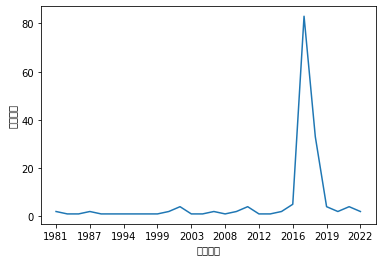

In [31]:
# 포항시 지진 발생 횟수 그래프

total_len = len(eq_r('포항').index)

sns.set_style()
sns.lineplot(x='발생시각', y='발생지역', data=eq_r('포항'))
plt.xlabel('발생년도', fontsize=10)
plt.ylabel('발생횟수', fontsize=10)
plt.xticks(np.arange(0,total_len+1, 3))

plt.show()

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 54943 (\N{HANGUL SYLLABLE HOES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IP

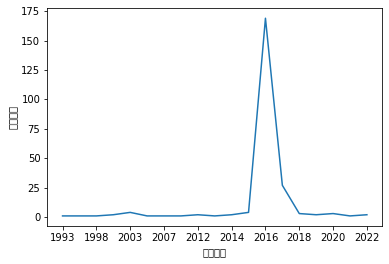

In [32]:
# 경주시 지진 발생 횟수 그래프

total_len = len(eq_r('경주').index)

sns.set_style()
sns.lineplot(x='발생시각', y='발생지역', data=eq_r('경주'))
plt.xlabel('발생년도', fontsize=10)
plt.ylabel('발생횟수', fontsize=10)
plt.xticks(np.arange(0,total_len+1, 2))

plt.show()

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 54943 (\N{HANGUL SYLLABLE HOES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IP

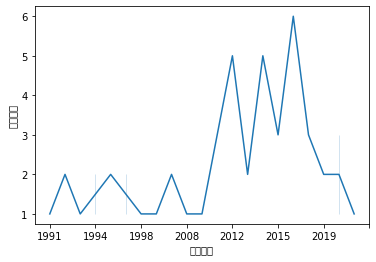

In [33]:
# 울산광역시 지진 발생 횟수 그래프

total_len = len(eq_r('울산').index)

sns.set_style()
sns.lineplot(x='발생시각', y='발생지역', data=eq_r('울산'))
plt.xlabel('발생년도', fontsize=10)
plt.ylabel('발생횟수', fontsize=10)
plt.xticks(np.arange(0,total_len-1, 3))
plt.show()

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 54943 (\N{HANGUL SYLLABLE HOES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IP

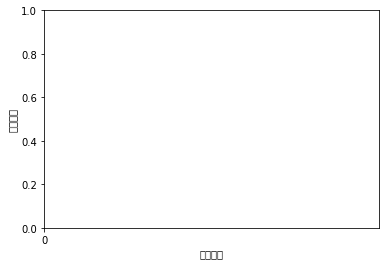

In [34]:
# 양산시 지진 발생 횟수 그래프 = 지진 발생 x

total_len = len(eq_r('양산').index)

sns.set_style()
sns.lineplot(x='발생시각', y='발생지역', data=eq_r('양산'))
plt.xlabel('발생년도', fontsize=10)
plt.ylabel('발생횟수', fontsize=10)
plt.xticks(np.arange(0,total_len+1, 2))

plt.show()

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 54943 (\N{HANGUL SYLLABLE HOES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IP

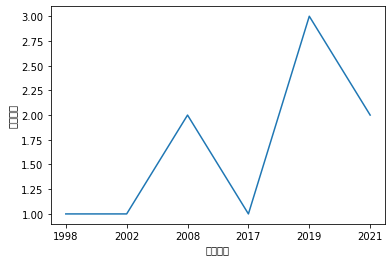

In [35]:
# 밀양시 지진 발생 횟수 그래프

total_len = len(eq_r('밀양').index)

sns.set_style()
sns.lineplot(x='발생시각', y='발생지역', data=eq_r('밀양'))
plt.xlabel('발생년도', fontsize=10)
plt.ylabel('발생횟수', fontsize=10)

plt.show()

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 54943 (\N{HANGUL SYLLABLE HOES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IP

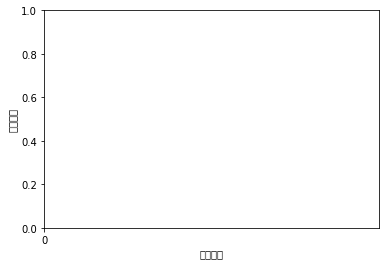

In [36]:
# 김해시 지진 발생 횟수 그래프 - 지진 발생 x

total_len = len(eq_r('김해').index)

sns.set_style()
sns.lineplot(x='발생시각', y='발생지역', data=eq_r('김해'))
plt.xlabel('발생년도', fontsize=10)
plt.ylabel('발생횟수', fontsize=10)
plt.xticks(np.arange(0,total_len+1, 2))

plt.show()

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 54943 (\N{HANGUL SYLLABLE HOES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IP

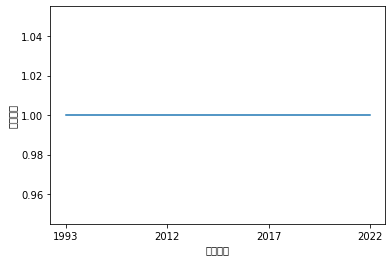

In [37]:
# 창원시 지진 발생 횟수 그래프

total_len = len(eq_r('창원').index)

sns.set_style()
sns.lineplot(x='발생시각', y='발생지역', data=eq_r('창원'))
plt.xlabel('발생년도', fontsize=10)
plt.ylabel('발생횟수', fontsize=10)

plt.show()

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 54943 (\N{HANGUL SYLLABLE HOES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IP

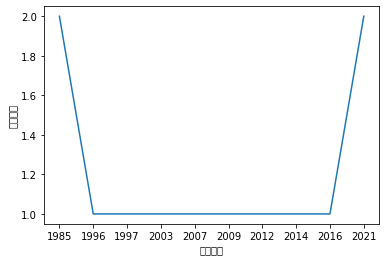

In [38]:
# 부산광역시 지진 발생 횟수 그래프

total_len = len(eq_r('부산').index)

sns.set_style()
sns.lineplot(x='발생시각', y='발생지역', data=eq_r('부산'))
plt.xlabel('발생년도', fontsize=10)
plt.ylabel('발생횟수', fontsize=10)

plt.show()

In [39]:
# 전국 지진 발생 횟수 그래프

idx = eq[eq.발생지역.str.contains('북한')].index # 전국지진발생 데이터에서 북한이 포함된 데이터 인덱스 찾기
eq_wn = eq.drop(idx) # 북한을 제외한 전국 지진발생 데이터프레임 생성
eq_wn.reset_index(drop=True)

,발생시각,규모,위도,경도,위치,발생지역
0,2023,2.1,36.79,125.63,충남 태안군 서격렬비도 북북동쪽 21km 해역,충남 태안군
1,2023,3.0,35.21,127.94,경남 진주시 서북서쪽 16km 지역,경남 진주시
2,2023,2.5,34.67,127.36,전남 고흥군 북동쪽 11km 지역,전남 고흥군
3,2023,2.3,36.52,127.85,충북 보은군 동북동쪽 11km 지역,충북 보은군
4,2023,2.5,36.46,129.63,경북 영덕군 동북동쪽 24km 해역,경북 영덕군
...,...,...,...,...,...,...
1721,1979,2.9,36.60,126.70,충남 홍성군 동쪽 3km 지역,충남 홍성군
1722,1978,3.3,35.90,126.30,전북 군산시 서남서쪽 38km 해역,전북 군산시
1723,1978,2.8,37.40,128.70,강원 정선군 북동쪽 4km 지역,강원 정선군
1724,1978,5.0,36.60,126.70,충남 홍성군 동쪽 3km 지역,충남 홍성군


In [40]:
eq_wn['발생지역'] = eq.위치.str.split().str[0]
eq_wn['발생지역']

3       충남
4       경남
5       전남
6       충북
9       경북
        ..
2110    충남
2111    전북
2112    강원
2114    충남
2115    경북
Name: 발생지역, Length: 1726, dtype: object

In [41]:
eq_wn['발생시각'] = eq.발생시각.str.split('-').str[0]
eq_wn['발생시각']

3       2023
4       2023
5       2023
6       2023
9       2023
        ... 
2110    1979
2111    1978
2112    1978
2114    1978
2115    1978
Name: 발생시각, Length: 1726, dtype: object

In [42]:
data = (eq_wn.groupby(['발생지역', '발생시각'])).agg(count=('발생지역', 'count'))
data.head()
# pd.DataFrame(eq_wn.groupby(['발생지역', '발생시각'])['발생지역'].count())

count
발생지역 발생시각       
강원   1978      1
     1979      1
     1980      1
     1981      1
     1984      1

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 54943 (\N{HANGUL SYLLABLE HOES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IP

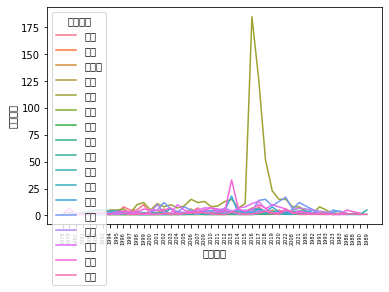

In [43]:
# 전국 지진 발생 횟수 그래프

total_len = len(data.index)

sns.set_style()
sns.lineplot(x='발생시각', y='count', data=data, hue='발생지역')
plt.xlabel('발생년도', fontsize=10)
plt.ylabel('발생횟수', fontsize=10)
plt.xticks(rotation=90, fontsize=5)

plt.show()

### 버블맵, 히트맵, 마커클러스터로 국내 지진 횟수 시각화

In [44]:
import folium
from folium import plugins

In [45]:
eq_wn.reset_index(drop=True)

,발생시각,규모,위도,경도,위치,발생지역
0,2023,2.1,36.79,125.63,충남 태안군 서격렬비도 북북동쪽 21km 해역,충남
1,2023,3.0,35.21,127.94,경남 진주시 서북서쪽 16km 지역,경남
2,2023,2.5,34.67,127.36,전남 고흥군 북동쪽 11km 지역,전남
3,2023,2.3,36.52,127.85,충북 보은군 동북동쪽 11km 지역,충북
4,2023,2.5,36.46,129.63,경북 영덕군 동북동쪽 24km 해역,경북
...,...,...,...,...,...,...
1721,1979,2.9,36.60,126.70,충남 홍성군 동쪽 3km 지역,충남
1722,1978,3.3,35.90,126.30,전북 군산시 서남서쪽 38km 해역,전북
1723,1978,2.8,37.40,128.70,강원 정선군 북동쪽 4km 지역,강원
1724,1978,5.0,36.60,126.70,충남 홍성군 동쪽 3km 지역,충남


In [46]:
eq_wn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1726 entries, 3 to 2115
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   발생시각    1726 non-null   object 
 1   규모      1726 non-null   float64
 2   위도      1726 non-null   object 
 3   경도      1726 non-null   object 
 4   위치      1726 non-null   object 
 5   발생지역    1726 non-null   object 
dtypes: float64(1), object(5)
memory usage: 94.4+ KB


In [47]:
# 비어있는 위도, 경도 데이터 확인 및 삭제
idx2 = eq_wn[eq_wn['위도'].str.contains('-')].index
eq_wn2 = eq.drop(idx2)
eq_wn2.reset_index(drop=True)

,발생시각,규모,위도,경도,위치,발생지역
0,2023,2.4,41.27,129.14,북한 함경북도 길주 북북서쪽 38km 지역,북한 함경북도
1,2023,2.1,41.27,129.06,북한 함경북도 길주 북북서쪽 42km 지역,북한 함경북도
2,2023,2.1,36.79,125.63,충남 태안군 서격렬비도 북북동쪽 21km 해역,충남 태안군
3,2023,3.0,35.21,127.94,경남 진주시 서북서쪽 16km 지역,경남 진주시
4,2023,2.5,34.67,127.36,전남 고흥군 북동쪽 11km 지역,전남 고흥군
...,...,...,...,...,...,...
2088,1978,2.8,37.40,128.70,강원 정선군 북동쪽 4km 지역,강원 정선군
2089,1978,4.6,38.40,125.60,북한 황해남도 안악 남동쪽 15km 지역,북한 황해남도
2090,1978,5.0,36.60,126.70,충남 홍성군 동쪽 3km 지역,충남 홍성군
2091,1978,5.2,36.60,127.90,경북 상주시 북서쪽 32km 지역,경북 상주시


In [48]:
eq_wn2.위도 = eq_wn2.위도.astype('float')
eq_wn2.경도 = eq_wn2.경도.astype('float')

In [49]:
# 버블맵
m = folium.Map(location=[36, 127], tiles="OpenStreetMap", zoom_start=7)

for i in range(0,len(eq_wn2)):
    lat = eq_wn2.iloc[i]['위도']
    long = eq_wn2.iloc[i]['경도']
    location = (lat, long)
    folium.CircleMarker(location, radius=eq_wn2.iloc[i]['규모']*4, color='#3186cc').add_to(m)
    
folium.LayerControl(collapsed=False).add_to(m)
m

In [50]:
# 마커클러스터
from folium.plugins import MarkerCluster

eq_wn2.규모 = eq_wn2.규모.astype('string') # popup으로 규모 표현하기 위해 타입을 문자열로 변환

m = folium.Map(location=[36, 127], tiles="OpenStreetMap", zoom_start=6)


mc = MarkerCluster().add_to(m)

for lat, long, size in zip(eq_wn2['위도'], eq_wn2['경도'], eq_wn2['규모']):
    folium.Marker([lat, long], icon=folium.Icon(color='red'),
                  popup=folium.Popup('진도 '+size, max_width=200)).add_to(mc)
    
m

Output hidden; open in https://colab.research.google.com to view.

In [51]:
# 히트맵
from folium import plugins
from folium.plugins import HeatMap

m = folium.Map(location=[36, 127], tiles = 'Cartodb Positron', zoom_start=7)

heat_df = eq_wn2[['위도', '경도']]

heat_data = [[row['위도'], row['경도']] for index, row in heat_df.iterrows()]

HeatMap(heat_data, radius=14).add_to(m)

m